# Hypothesis testing: Comprehensive Analysis in Base Pay Gap Based on Gender

By Rouf Helmi, Howard Sun, Yashita Salwan, and Xiaolei Lin.

# Introduction

The gender pay gap, a term denoting the disparity in earnings between men and women, has captured the public's attention for decades (Blau & Kahn, 2007). Over time, the pressing question arises: what is the current state of this issue? To address this, we turn our focus to the "Glassdoor Gender Pay Gap" dataset, obtained in 2020 from Glassdoor®, a platform known for its provision of anonymous company reviews. This dataset provides a distinctive perspective through which to examine the variability in salary among individuals with a sample size of 1000, including variables such as Job Title, Gender, Age, Performance Evaluations, Education Level, Department, and Seniority.

While some argue that factors such as education level and seniority could influence one's income, previous research has shown that they only partially account for the existing disparities (Naff, 1994). In our study, we perform a comprehensive analysis concentrating specifically on how the mean base pay differs between males and females. We aim to investigate whether a gender pay gap exists in the population, which is all professionals active in the job market.

# Preliminary Analysis

We loaded the necessary packages for our analysis.

In [1]:
library(tidyverse)
library(broom)
library(repr)
library(digest)
library(infer)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


#### Read the data into R

In [2]:
pay_data <- read_csv("https://raw.githubusercontent.com/how1219/STAT201-Project-Group33/main/Glassdoor%20Gender%20Pay%20Gap.csv")
head(pay_data)

Rows: 1000 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): JobTitle, Gender, Education, Dept
dbl (5): Age, PerfEval, Seniority, BasePay, Bonus

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus
<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
Graphic Designer,Female,18,5,College,Operations,2,42363,9938
Software Engineer,Male,21,5,College,Management,5,108476,11128
Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268
Software Engineer,Male,20,5,Masters,Sales,4,108080,10154
Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319
IT,Female,20,5,PhD,Operations,4,70890,10126


#### Clean and wrangle the data:

We select columns that will be used in our study, which are Gender and BasePay, and remove possible missing values.

In [3]:
pay_pop <- pay_data |>
    select(Gender, BasePay) |>
    filter(!is.na(Gender), !is.na(BasePay))

head(pay_pop)

Gender,BasePay
<chr>,<dbl>
Female,42363
Male,108476
Female,90208
Male,108080
Male,99464
Female,70890


#### Compute estimates of the parameter

We compute estimates of the parameter, specifically the mean base pay for each gender group, and present in a clear and concise table format. Then calculate the the difference from Male and Female genders.

In [4]:
pay_summary_table <- pay_pop %>%
  group_by(Gender) %>%
  summarise(MeanBasePay = mean(BasePay))

pay_summary_table

sample_diff <- pay_summary_table%>%
    summarise(diff = diff(MeanBasePay))%>%
    pull()

sample_diff

Gender,MeanBasePay
<chr>,<dbl>
Female,89942.82
Male,98457.55


[1] 8514.727

#### Plot the data

We create a box plot showing means and spreads of base pay and a histogram of distribution of base pay between genders.

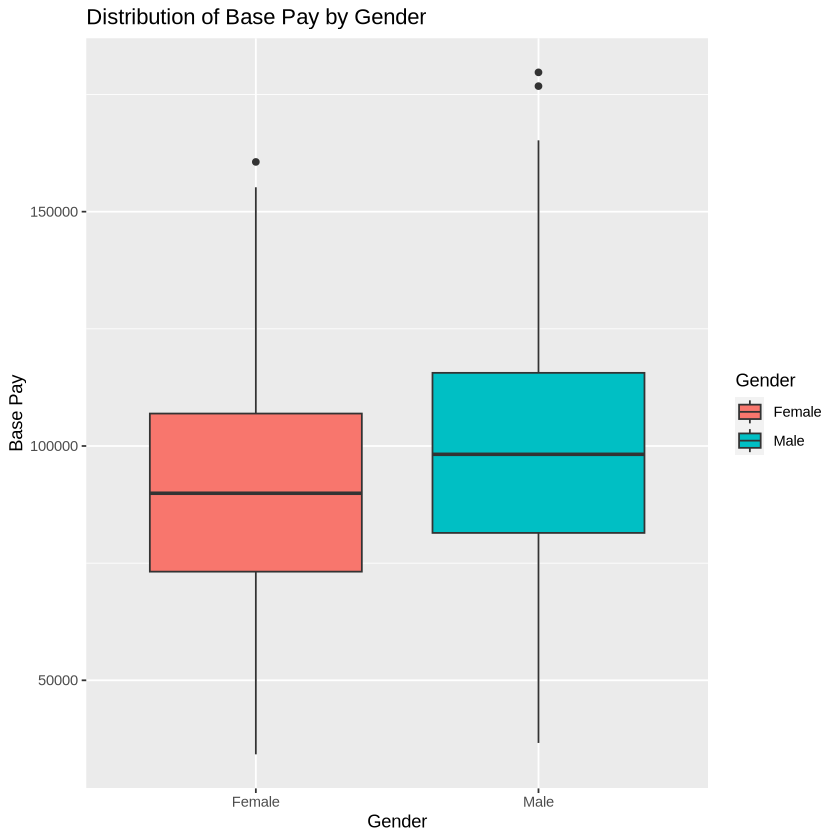

In [5]:
pop_box <- pay_pop |>
    ggplot() +
    geom_boxplot(aes(x = Gender, y = BasePay, fill = Gender)) +
    labs(title = "Distribution of Base Pay by Gender",
       x = "Gender", y = "Base Pay")

pop_box

*<span style="color:gray;">Figure 1. Gender Pay Gap Distribution by Gender</span>*

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


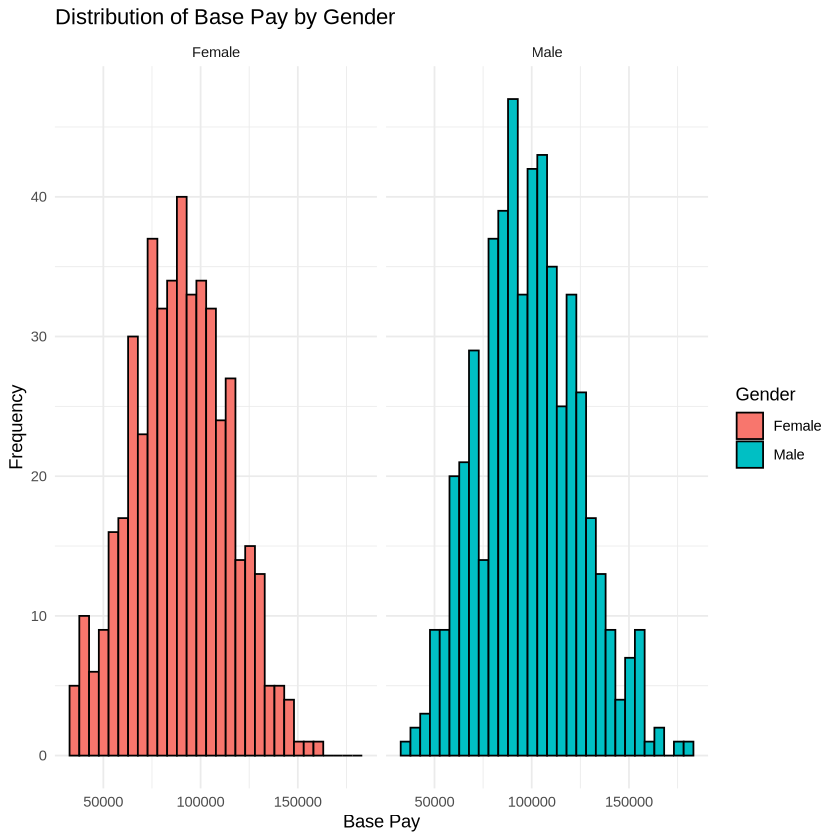

In [6]:
pop_histogram <- pay_pop |>
    ggplot() +
    geom_histogram(aes(x = BasePay, fill = Gender), color = "black") +
    labs(title = "Distribution of Base Pay by Gender",
         x = "Base Pay", y = "Frequency") +
    theme_minimal() +
    facet_wrap(~Gender)

pop_histogram

*<span style="color:gray;">Figure 2. Population Distribution of Base Pay by Gender</span>*

Based on the visualizations, the distributions of base pay are approximately symmetric and unimodal for males and females, and there is evidence of a difference in the mean base pay between males and females, with males having a higher mean pay. To further examine this observation, we conduct hypothesis testing as follows.

# Methods and Results

### Null Model and p-value

A tidy dataset of sample data, consisting of the gender and the BasePay columns, has been acquired, facilitating the formulation of null and alternate hypotheses tailored to this particular scenario. In light of the prevalent coexistence of both male and female employees in contemporary workplaces, our proposed null and alternate hypotheses take the form of:

**Null Hypothesis (H0):** The mean base pay for males ($\mu_{male}$) equals the mean base pay for females ($\mu_{female}$).
 
 $H_0: \mu_{male}-\mu_{female} = 0$
 
 **Alternative Hypothesis (H1):** The mean base pay for males ($\mu_{male}$)  is greater than the mean base pay for females ($\mu_{female}$).
 
 $H_1: \mu_{male}-\mu_{female} > 0$.
 
 We plan to test at the siginificance level of $\alpha = 0.05$.
 
 First of all, we obtain the observed test statistic $\bar\mu_{male}-\bar\mu_{female}$ by specifying the response variable `BasePay` and the explanatory variable `Gender`, and calculating the difference in means between the two groups specified in the formula.

In [7]:
obs_diff_in_means <- pay_pop |>
    specify(formula = BasePay ~ Gender) |>
    calculate(stat = "diff in means", order = c("Male", "Female")) |>
    pull()

obs_diff_in_means

[1] 8514.727

We set seed so that the result would be reproducible, and generate $2000$ samples from the null distribution. Here, we specify the null hypothesis "independence" for the permutation test since we are testing whether there is an association between Gender and BasePay — essentially, if the gender affects the base pay.

In [8]:
set.seed(1234)

null_model_pay <- pay_pop |>
   specify(formula = BasePay ~ Gender) |>
   hypothesize(null = "independence") |>
   generate(reps = 2000, type = "permute") |>
   calculate(stat = "diff in means", order = c("Male", "Female"))
head(null_model_pay)

replicate,stat
<int>,<dbl>
1,-672.53228
2,-3173.78943
3,418.96650
4,-1956.47932
5,-40.42316
6,1438.54269


We visualize the null model along with the observed test statistic. We are testing for whether the mean for `Male` is significantly greater than that for `Female`, therefore we shade the area to the right of the observed value.

Warning message in min(diff(unique_loc)):
“no non-missing arguments to min; returning Inf”


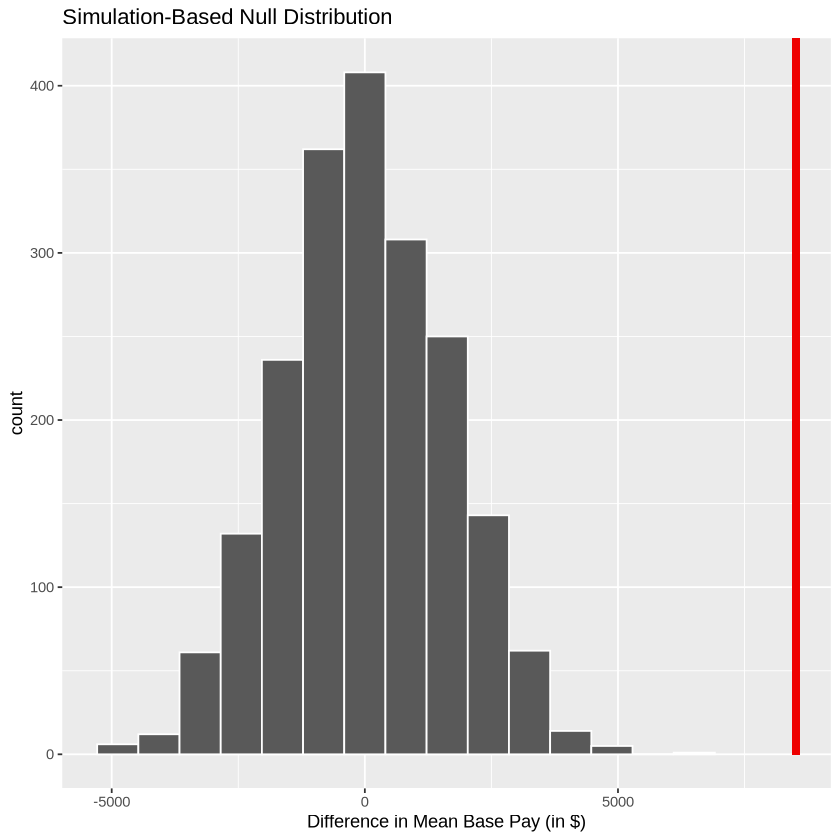

In [9]:
pay_result_plot <- 
   null_model_pay %>%
   visualize() +                                                         
   shade_p_value(obs_stat = obs_diff_in_means, direction = "right") + 
   labs(x = "Difference in Mean Base Pay (in $)")

pay_result_plot

*<span style="color:gray;">Figure 3. Simulated-Based Null Distribution of Difference in Mean Base Pay</span>*

We obtain the p-value from the null distribution `null_model_pay`.

In [10]:
p_value <- null_model_pay |>
    get_p_value(obs_stat = obs_diff_in_means, direction = "right")
p_value

Warning message:
“Please be cautious in reporting a p-value of 0. This result is an approximation based on the number of `reps` chosen in the `generate()` step. See `?get_p_value()` for more information.”


p_value
<dbl>
0


We observe that the p-value is reported to be $0$, which represents a very small p-value that is smaller than $0.001$. This indicates that the observed test statistic would be extremely unlikely under the null hypothesis, further suggesting that there is strong evidence to reject the null hypothesis $H_0: \mu_{male}-\mu_{female} = 0$ at $5\%$ siginificance level.

### Finding Confidence Interval with Bootstrapping
We would like to find the $95\%$ confidence interval for the difference in mean.<br>
To do this, we specify the response `BasePay` and explanatory variable `Gender`, generate 2000 samples, and calculate difference in means with "diff in means". We obtain the bootstarp distribution `pay_bootstrap`.

In [11]:
set.seed(1234)
pay_bootstrap <- pay_pop |>
    specify(formula = BasePay ~ Gender) |>
    generate(reps = 2000, type = "bootstrap") |>
    calculate(stat = "diff in means", order = c("Male", "Female"))

head(pay_bootstrap)

replicate,stat
<int>,<dbl>
1,8302.605
2,8342.403
3,7102.214
4,7420.844
5,10685.784
6,7579.531


We calculate the confidence interval with significance level $0.05$ and plot the result, in which $95\%$ confidence interval is shown as the shaded area.

In [12]:
bootstrap_confidence_interval <- pay_bootstrap |>
    get_ci(level = 0.95, type = "percentile")

bootstrap_confidence_interval

lower_ci,upper_ci
<dbl>,<dbl>
5429.527,11416.75


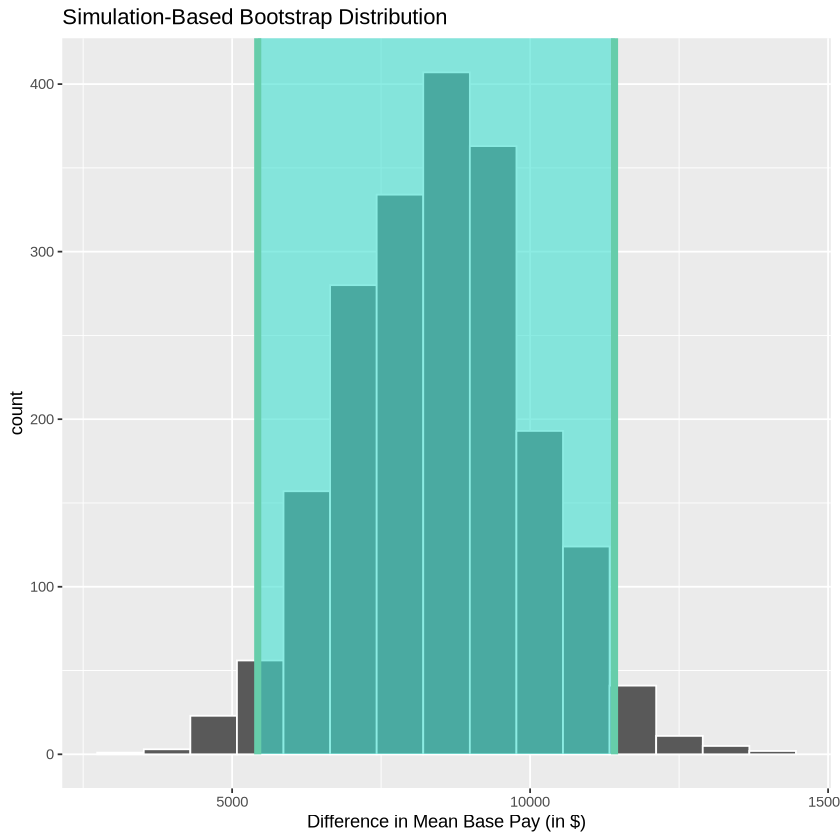

In [13]:
pay_ci_plot <- pay_bootstrap |>
    visualize() +
    shade_confidence_interval(endpoints = bootstrap_confidence_interval) +
    labs(x = "Difference in Mean Base Pay (in $)")

pay_ci_plot

*<span style="color:gray;">Figure 4. Simulated-Based Bootstrap Distribution of Difference in Mean Base Pay</span>*

This confidence interval represents that based on our sample data and the resampling process, we are 95% confident that the true difference in means lies within $[5429.527, 11416.75]$. The observed test statistic $8514.727$ falls within this interval, which indicates that it is a plausible estimate of the true difference, therefore providing evidence to reject the null hypothesis at $\alpha = 0.05$.

### Alternative Method: Two-Sample t-test

In our analysis, the independence of male and female groups for the two-sample t-test is supported by several key factors. Firstly, the method of data collection ensured that individuals from each gender were selected independently, without any pairing or matching based on other characteristics. Additionally, there's no evidence to suggest that the BasePay for one gender influences or is dependent on the BasePay for the other. The random and separate selection of individuals for each group, along with the absence of any interconnected factors between the two, supports the assumption of independence necessary for the validity of the two-sample t-test in our study.

Here, we will propose to use t-test method to do this hypothesis testing. The reason behind it is since we do not have the population standard distribution for both population (Figure 2), and since we are assuming that two population is independent. our proposed null and alternate hypotheses take the form of:

**Null Hypothesis (H0):** The mean base pay for males ($\mu_{male}$) equals the mean base pay for females ($\mu_{female}$).
 
 $H_0: \mu_{male}-\mu_{female} = 0$
 
 **Alternative Hypothesis (H1):** The mean base pay for males ($\mu_{male}$)  is greater than the mean base pay for females ($\mu_{female}$).
 
 $H_1: \mu_{male}-\mu_{female} > 0$.
 
We plan to take the same significance level with the bootstrap level which is $\alpha = 0.05$.

We will conduct the t-test with `t.test` code provided by `Infer` package to deal with this hypothesis testing.

In [14]:
tidy(t.test(x = filter(pay_pop, Gender == "Male")$BasePay,
               y = filter(pay_pop, Gender == "Female")$BasePay,
               alternative = "greater",
               conf.level = 0.95))


estimate,estimate1,estimate2,statistic,p.value,parameter,conf.low,conf.high,method,alternative
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
8514.727,98457.55,89942.82,5.391847,4.35946e-08,991.2189,5914.768,Inf,Welch Two Sample t-test,greater


Testing against the alternative hypothesis  $H_1: \mu_{male}-\mu_{female} > 0$, the confidence interval is constructed only on one side (the lower side in this case), the upper bound of this interval is therefore not constrained.

We observe that the p-value is reported to be $4.35946e-08$, which represents a very small p-value that is smaller than our $\alpha = 0.05$  . This indicates that the observed test statistic would be as well extremely unlikely under the null hypothesis, further suggesting that there is strong evidence to reject the null hypothesis $H_0: \mu_{male}-\mu_{female} = 0$ at $5\%$ siginificance level.

# Discussion

Our analysis demonstrates that the test statistic reliably estimates the true difference in means, as shown by the construction of a $95\%$ confidence interval $[5429.527, 11416.75]$ using the bootstrap method (Figure 4). Further, when we compare our observed test statistic against the null distribution (Figure 3), we find a p-value reporting as $0$, which is in fact a value smaller than $0.001$. This result provides strong evidence for the rejection of the null hypothesis, indicating a statistically significant difference in mean base pay between males and females. 

In addition, we conducted a two-sample t-test which produced a p-value of $4.359e-08$. We obtain the confidence interval $[5914.768, \inf]$ from the test. This corresponds to our findings from the permutation hypothesis testing, providing more evidence to reject the null hypothesis. 

However, while the exceedingly small p-value can be interpreted as evidence against the null hypothesis, caution is warranted. A small p-value does not inherently imply a large or practically significant effect size. Moreover, the focus on the p-value alone risks overlooking other critical aspects of the dataset, such as potential biases and data quality. For instance, our sample data from Glassdoor® may contain biases, as users self-report their income, possibly skewing results towards higher earners. Additionally, the user base might not fully represent the entire job market, potentially limiting the generalizability of our findings to all professionals. Therefore, it's essential to interpret these findings within the broader context of the research, considering both statistical and practical significance. This balanced approach ensures a more comprehensive understanding of the results, guarding against overinterpretation and ensuring that conclusions are drawn not just from statistical significance but from a holistic evaluation of the data. 

This outcome, while anticipated, still presented a stark reflection of the ongoing challenges in achieving gender pay equality. The disparity between base pay between men and women has been a continuous issue throughout the century and is quite complex in nature. These discrepancies reveal a covert systemic inequality against women. Past research has revealed that despite advancements in educational attainment, position title, and work experience, there is still a hefty wage gap present (Carnevale et al., 2018). The findings of this study can further be extended to explore how these disparities exist within various sectors and the extent to which they vary. A one-way ANOVA can be used to conduct a study in this manner, with the levels being ‘IT & Technology’, ‘Government’, ‘Healthcare’, & ‘Finance’. By differentiating the base mean pay within these levels, we can discern whether higher levels of education correspond to a higher salary. We may also include a broader range of job roles, enhancing our analysis of the gender pay gap, which will provide a more complete view across various sectors and positions. Another avenue for future research could be to assess how parental leave policies and childcare responsibilities impact the gender pay gap, particularly focusing on the long-term career progression and earnings of individuals. Also, in the context of increasing remote work and flexible working arrangements, especially post-pandemic, future research could examine how these trends impact the gender pay gap.

Studies of this nature are crucial in revealing the numerous extraneous factors which are taken into consideration when determining an employee's pay. By understanding the magnitude of these factors, policymakers can go about implementing a fair and transparent compensation system within organizations. 


# References

Dataset: https://www.kaggle.com/datasets/nilimajauhari/glassdoor-analyze-gender-pay-gap/data

Blau, F. D., & Kahn, L. M. (2007). The gender pay gap: Have women gone as far as they can? Academy of Management Perspectives, 21(1), 7-23. https://doi.org/10.5465/AMP.2007.24286161

Carnevale, A. P., Smith, N., Gulish, A., & Georgetown University, Center on Education and the Workforce. (2018). Women can't win: Despite making educational gains and pursuing high-wage majors, women still earn less than men. Georgetown University Center on Education and the Workforce.

Naff, K. C. (1994). Through the glass ceiling: Prospects for the advancement of women in the federal civil service. Public Administration Review, 54(6), 507-514. https://doi.org/10.2307/976669
